### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [56]:
import pandas as pd
df=pd.read_csv('C:/Users/Eeshwari/Desktop/GreatLearning/vehicle.csv').dropna()
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [57]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### 3. Check for any missing values in the data 

In [58]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [59]:
df1=df.drop(['class'],axis=1)

from scipy import stats
# zscore
df1.apply(stats.zscore)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
842,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
843,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
844,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

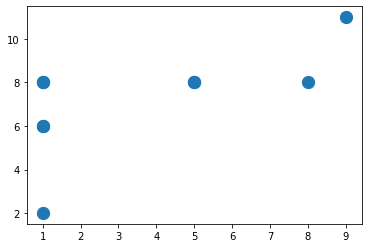

In [60]:
import numpy as np
import matplotlib.pyplot as plt

dist=np.array(np.array([[1, 2],
              [1, 8],
              [5, 8 ],
              [8, 8],
              [1, 6],
              [9,11],[1, 6],[1, 8],
              [5, 8 ]]))
plt.scatter(dist[:,0], dist[:,1], s=150)


In [61]:
dist=pd.DataFrame(dist)
dist

,0,1
0,1,2
1,1,8
2,5,8
3,8,8
4,1,6
5,9,11
6,1,6
7,1,8
8,5,8


### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [62]:
# kmeans_s = KMeans(n_clusters=4, max_iter=1000).fit(dist)
# kmeans_s.inertia_


In [64]:
from sklearn.cluster import KMeans
cluster_range=range(1,10)
wcss=[]
for num_clusters in cluster_range:
    kmean_s=KMeans(num_clusters,n_init=10)
    kmean_s.fit(df1)
    labels=kmean_s.labels_
    wcss.append(kmean_s.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'SSE':wcss})
clusters_df

,num_clusters,SSE
0,1,2.917617e+07
1,2,6.905477e+06
2,3,4.610991e+06
3,4,3.333252e+06
4,5,2.288297e+06
5,6,1.823916e+06
6,7,1.601418e+06
7,8,1.450536e+06
8,9,1.308526e+06


**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [65]:
from sklearn.cluster import KMeans
cluster_range=range(1,10)
wcss=[]
for num_clusters in cluster_range:
    kmeans=KMeans(num_clusters,n_init=10)
    kmeans.fit(df1)
    labels=kmeans.labels_
    wcss.append(kmeans.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'Inertia':wcss})
clusters_df

,num_clusters,Inertia
0,1,2.917617e+07
1,2,6.905477e+06
2,3,4.610991e+06
3,4,3.333252e+06
4,5,2.288297e+06
5,6,1.823916e+06
6,7,1.601418e+06
7,8,1.441592e+06
8,9,1.357649e+06


### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

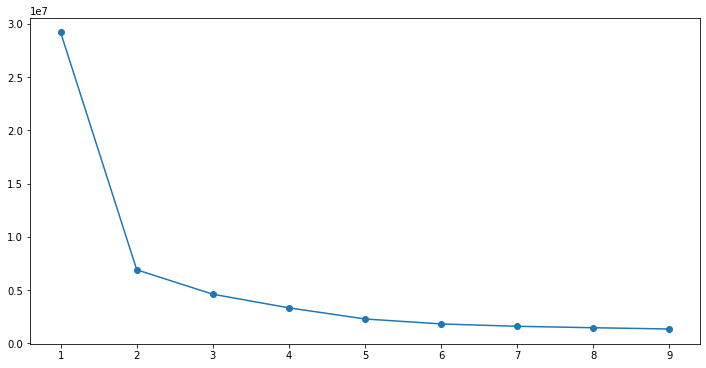

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.Inertia,marker='o')
plt.show()

### 8. Find out the optimal value of K

K=2 is the optimal value as seen in the elbow graph above

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [27]:
kmeans=KMeans(n_clusters=4,n_init=15)
kmeans.fit(df1)
kmeans.cluster_centers_

array([[ 97.96031746,  46.5952381 ,  93.16666667, 198.28571429,
         64.02380952,   8.5952381 , 187.23015873,  35.12698413,
         21.88095238, 149.92063492, 207.4047619 , 529.33333333,
        183.03968254,  68.26984127,   6.04761905,  13.57142857,
        193.07936508, 200.08730159],
       [ 89.22222222,  42.75438596,  75.74561404, 158.77192982,
         63.09356725,   8.85964912, 153.5380117 ,  43.52631579,
         19.29824561, 143.78654971, 176.35964912, 350.8245614 ,
        165.50292398,  73.57017544,   5.93859649,  11.1374269 ,
        188.4502924 , 195.00292398],
       [104.41666667,  53.40555556, 102.88888889, 201.16111111,
         61.82222222,   9.85555556, 219.15      ,  30.45555556,
         24.56666667, 167.6       , 231.47777778, 712.17222222,
        215.31111111,  72.92777778,   7.33888889,  16.2       ,
        187.62222222, 196.06666667],
       [ 87.82424242,  38.2969697 ,  63.86060606, 133.23636364,
         57.27272727,   6.69090909, 130.26666667,  51.696

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [29]:
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=df1.columns)
centroids

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,97.960317,46.595238,93.166667,198.285714,64.023810,8.595238,187.230159,35.126984,21.880952,149.920635,207.404762,529.333333,183.039683,68.269841,6.047619,13.571429,193.079365,200.087302
1,89.222222,42.754386,75.745614,158.771930,63.093567,8.859649,153.538012,43.526316,19.298246,143.786550,176.359649,350.824561,165.502924,73.570175,5.938596,11.137427,188.450292,195.002924
2,104.416667,53.405556,102.888889,201.161111,61.822222,9.855556,219.150000,30.455556,24.566667,167.600000,231.477778,712.172222,215.311111,72.927778,7.338889,16.200000,187.622222,196.066667
3,87.824242,38.296970,63.860606,133.236364,57.272727,6.690909,130.266667,51.696970,17.787879,133.351515,151.739394,251.733333,140.884848,72.551515,6.363636,11.393939,188.424242,193.539394


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [30]:
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 1, 1, 0, 2, 3, 0, 2, 1, 3, 1, 1, 2,
       1, 3, 2, 0, 1, 1, 3, 3, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 3, 1,
       1, 1, 3, 1, 2, 1, 2, 3, 0, 1, 2, 3, 0, 3, 3, 1, 0, 1, 2, 1, 0, 2,
       0, 3, 1, 0, 0, 1, 1, 2, 3, 1, 1, 2, 1, 3, 0, 3, 2, 1, 0, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 3, 3, 0, 0, 1, 1, 0, 1, 1, 1, 3, 1, 1, 0, 2, 0,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 0, 3, 2, 1, 1, 3, 3, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 3, 0, 0, 1, 2, 1, 2, 1, 3, 1, 3, 0, 1, 3, 2, 2,
       1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 0, 1, 3, 2, 3, 1, 3, 0, 0, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 3, 1,
       2, 3, 1, 2, 1, 3, 2, 1, 1, 3, 1, 2, 3, 2, 1, 3, 3, 1, 2, 3, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 0, 2, 3,
       0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 1, 2, 1, 1, 3, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 3, 3, 1, 1, 3, 2, 1, 0, 3, 0, 0, 2, 1, 1, 3, 1, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 3, 3, 0, 3, 2, 2, 1, 0, 1, 1,

In [31]:
kmeans.inertia_

3333252.1229019524

In [34]:

df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))

df_labels['class']=df_labels['labels'].astype('category')
df_k=pd.concat((df1,df_labels),axis=1,sort=False)
df_k.head()
df_k=pd.concat((df,df_labels),axis=1,sort=False)

In [35]:
print('For KMeans :','\n',df_k['labels'].value_counts())
print('-'*30)
print('For original data class :','\n',df['class'].value_counts())
print('-'*30)

For KMeans : 
 1.0    342
2.0    180
3.0    165
0.0    126
Name: labels, dtype: int64
------------------------------
For original data class : 
 car    413
bus    205
van    195
Name: class, dtype: int64
------------------------------
